# Final Project : Networks in Dolphin Communities
## Finn O'Connor, Charlie Kauffman, Andrew Dean


### Learning About the Network

What are the nodes? How many of them are there? 

The nodes are individual mixed-sex bottlenose dolphins. There are 62 nodes in this network.

In [19]:
# Finding number of nodes in network
N = len(Dolphins)
print(N)

62


What are the edges? 

The edges are the frequency of interactions, or association, that one dolphin has with another. There are 159 edges in this network.

In [21]:
# Finding number of edges in network
print(Dolphins_G.number_of_edges())

159


Is it weighted or unweighted?

The network is unweighted. We can see by the adjacency matrix below that the network is unweighted. 

In [22]:
Dolphins_W = np.load('dolphins.npy')
print(Dolphins_W)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


Is it connected or disconnected? If disconnected, is there a giant component?

This network is connected. This is upheld by the code below, which is upheld by the is.connected function being true, and telling us that for the whole graph there is only 1 connected component. 


Is there anything interesting or weird about this network?

One interesting thing from this network, which is explained by 

In [23]:
##Connectedness of the network##
print(nx.is_connected(dolphin_graph))
print(nx.number_connected_components(dolphin_graph))

True
1


What's the context of this network?

The context of this network is a community of bottlenose dolphins that live in Doubtful Sound, which is an area in New Zealand. The network sought to study and understand the relationships of the dolphins, based off of gender as well as frequency of interactions. The research on which this network was based also tried to highlight how different ecological factors influence this community of dolphins in particular. In particular, the area in which this research was conducted was fairly dependent on "co-operation" of the species, which leads to stronger associations, companionship, and relationships being formed [Lusseau 1]. This is supported by the degree distribution we see later on, and shows a different type of relationship between bottlenose dolphins than previous studies have shown. 

Do you have access to any metadata about the nodes?

The only metadata that we have access to for this given network data is the names of the dolphins, which allows us to understand each node in the network with a name as opposed to an ID number. 



### Creating the Adjacency Matrix

In [4]:
#Imports the necessary packages to graph our network

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
#Loads both the numpy and gml file, where the gml file contains the names of the dolphins
Dolphins = np.load( 'dolphins.npy')
dolphin_graph = nx.read_gml('dolphins.gml')

In [6]:
#Prints the adjacency matrix of the numpy file, printing the gml file tells us the number 
    #of edges and nodes in the graph
print(Dolphins)
print(dolphin_graph)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
Graph with 62 nodes and 159 edges


This code above allows us to see part of the adjacency matrix for the network, although it is too large to be printed all at once. Nonetheless, the part of it that is printed shows that it is unweighted and undirected. Lastly, the second print command uses the 'gml' file to count the number of edges and nodes that make up the network.

### Creating an Initial Plot of the Network

In [7]:
#Loads the gml file as a graph object, being able to label our plots with the names
Dolphins_G = nx.to_networkx_graph(dolphin_graph)

Dolphins_G2= nx.to_networkx_graph(Dolphins)

In [8]:
#Defines the position for the layout of the graph, 
    #circular position was easiest to see the relationships
pos = nx.spring_layout(Dolphins_G)

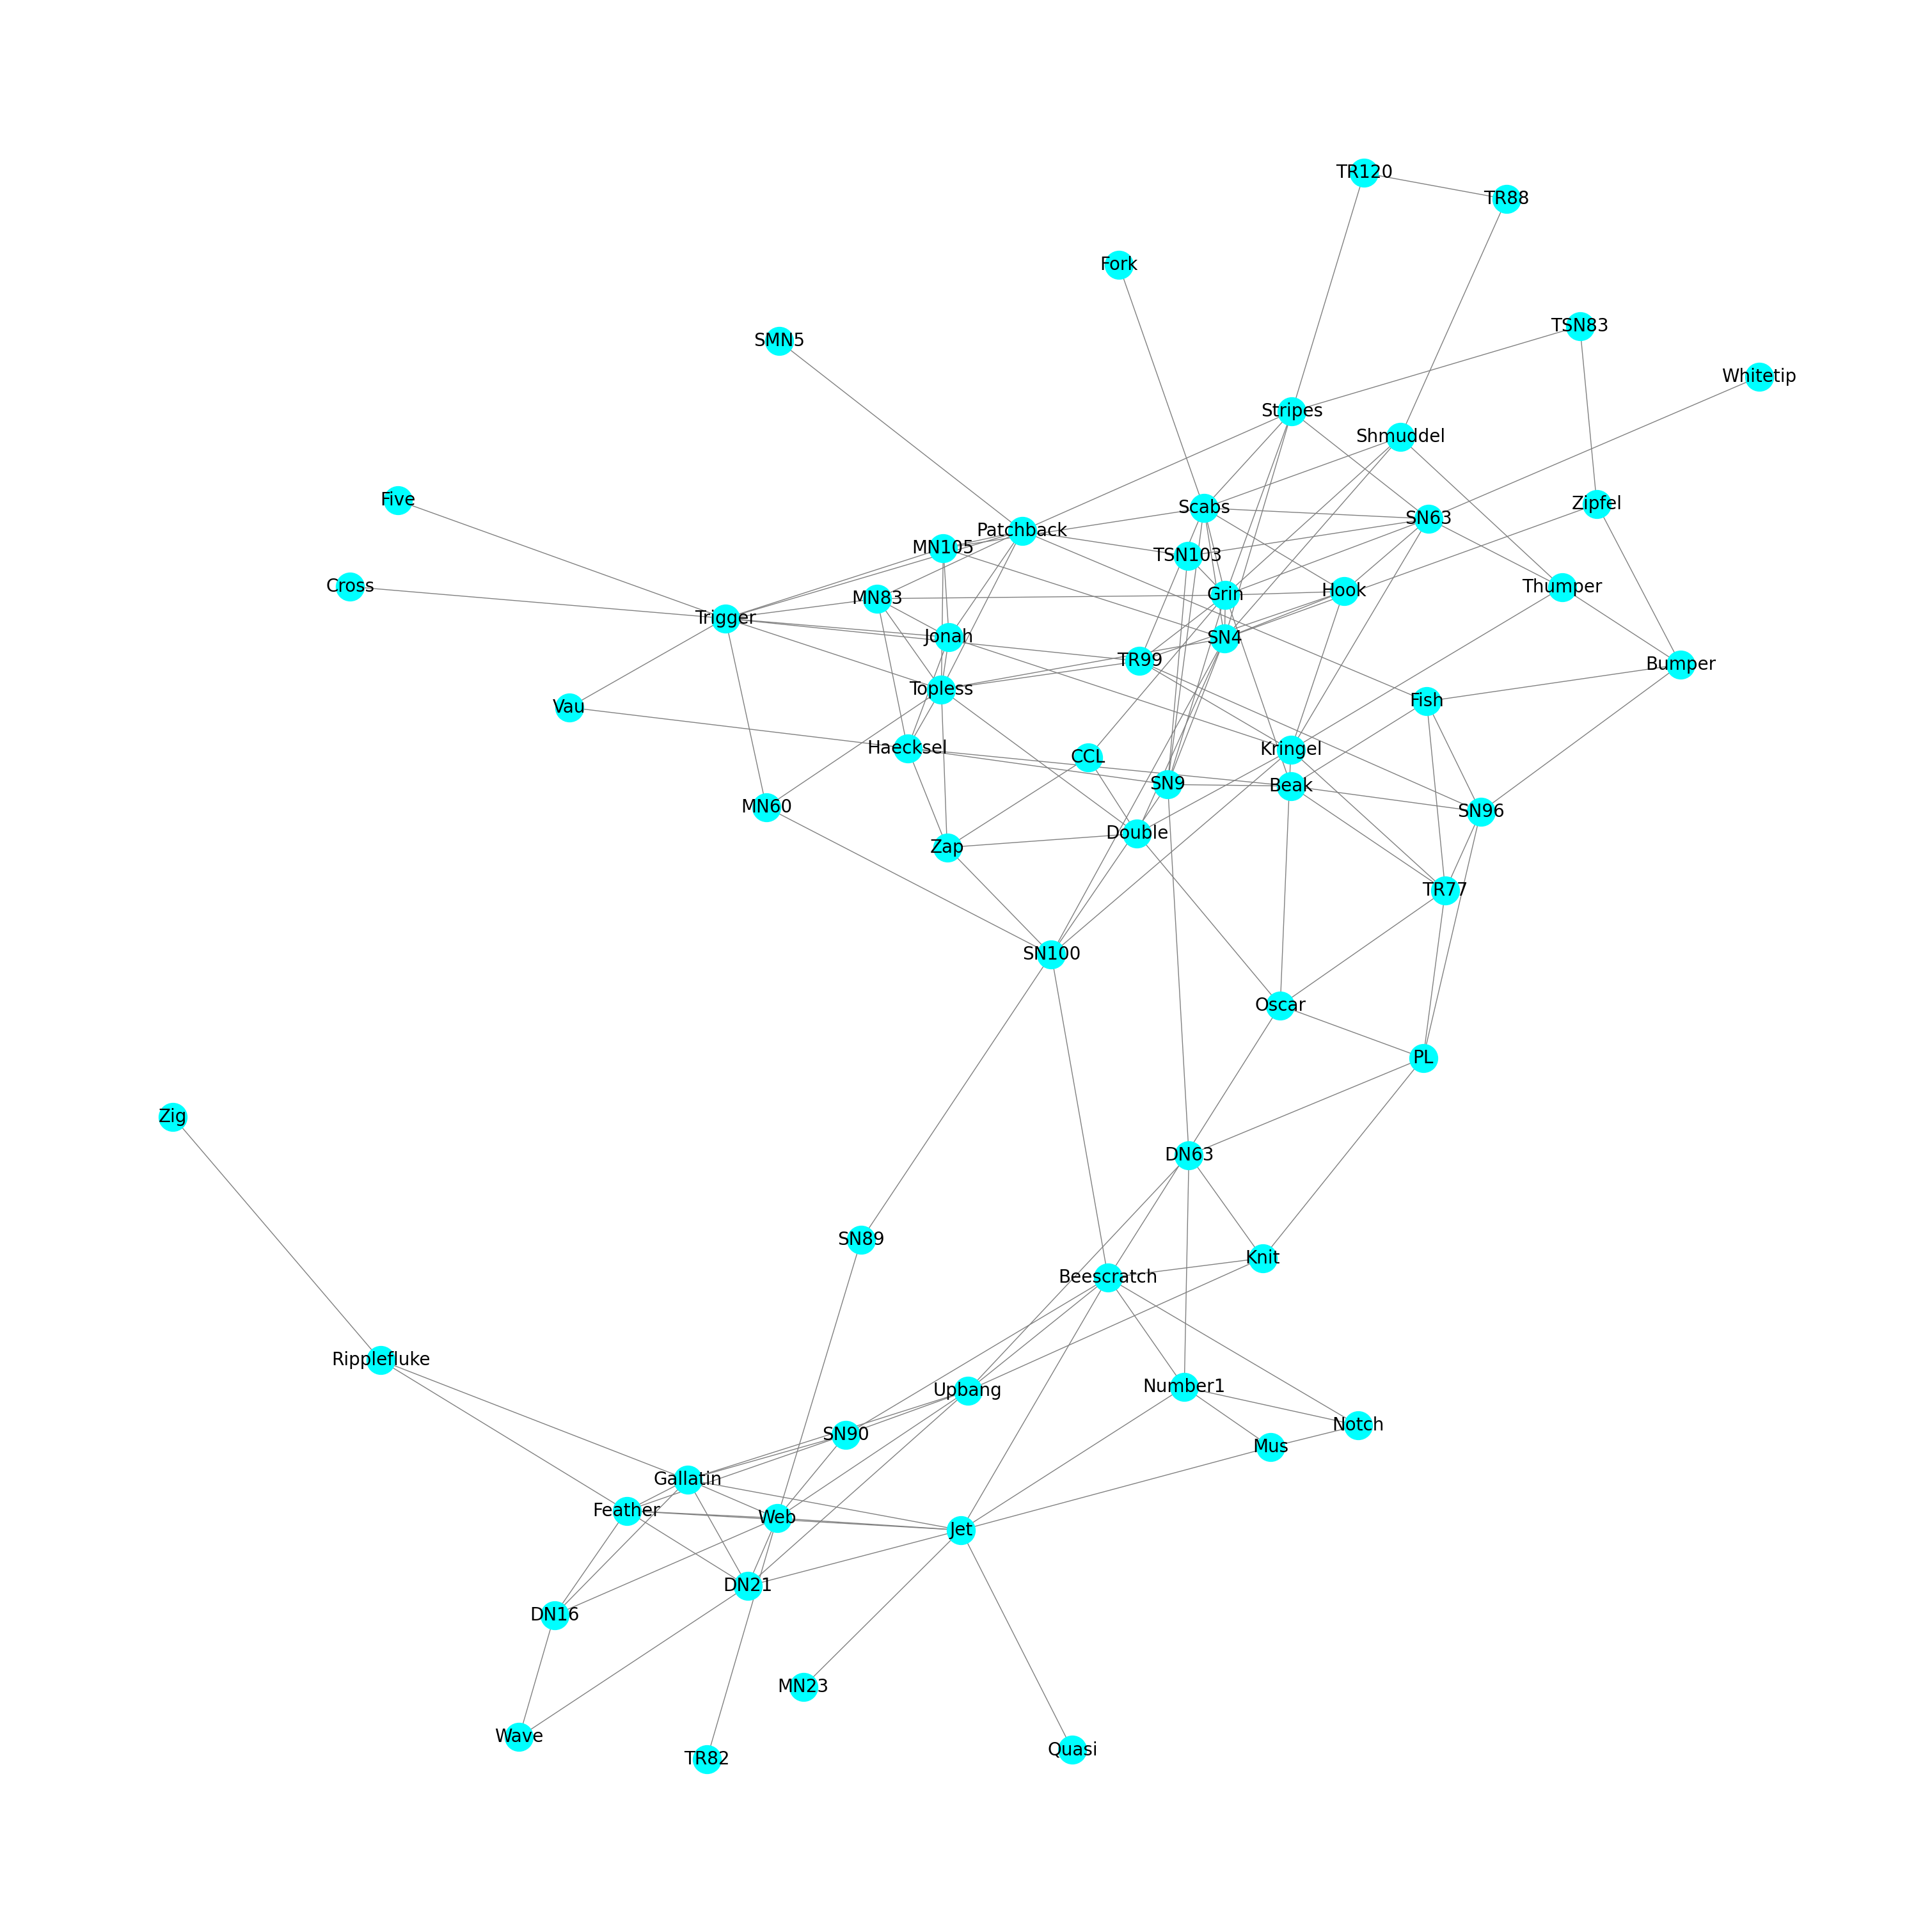

In [9]:
#Plots the graph for our whole network
plt.figure(figsize = (30,30) )
nx.draw(Dolphins_G, pos, node_color='cyan', 
        node_size=1000, edge_color='grey', with_labels=True, font_size = 20)

This code and graph represents the first plot of our network, where we can see a preliminary distribution of the relationships formed between the dolphins. Furthermore, it upholds the idea that our network is connected, unweighted, and undirected. 

### Understanding the Centrality of the Network

In [12]:
# Find the most central node(s)
a = nx.degree_centrality(Dolphins_G)
d = nx.closeness_centrality(Dolphins_G)
b = nx.eigenvector_centrality(Dolphins_G)
c = nx.betweenness_centrality(Dolphins_G)

print('The person with highest degree centrality is', max(a, key=lambda key: a[key]))
print('The person with highest closeness centrality is', max(d, key=lambda key: d[key]))
print('The person with highest eigenvector centrality is', max(b, key=lambda key: b[key]))
print('The person with highest betweenness centrality is', max(c, key=lambda key: c[key]))

The person with highest degree centrality is Grin
The person with highest closeness centrality is SN100
The person with highest eigenvector centrality is Grin
The person with highest betweenness centrality is SN100


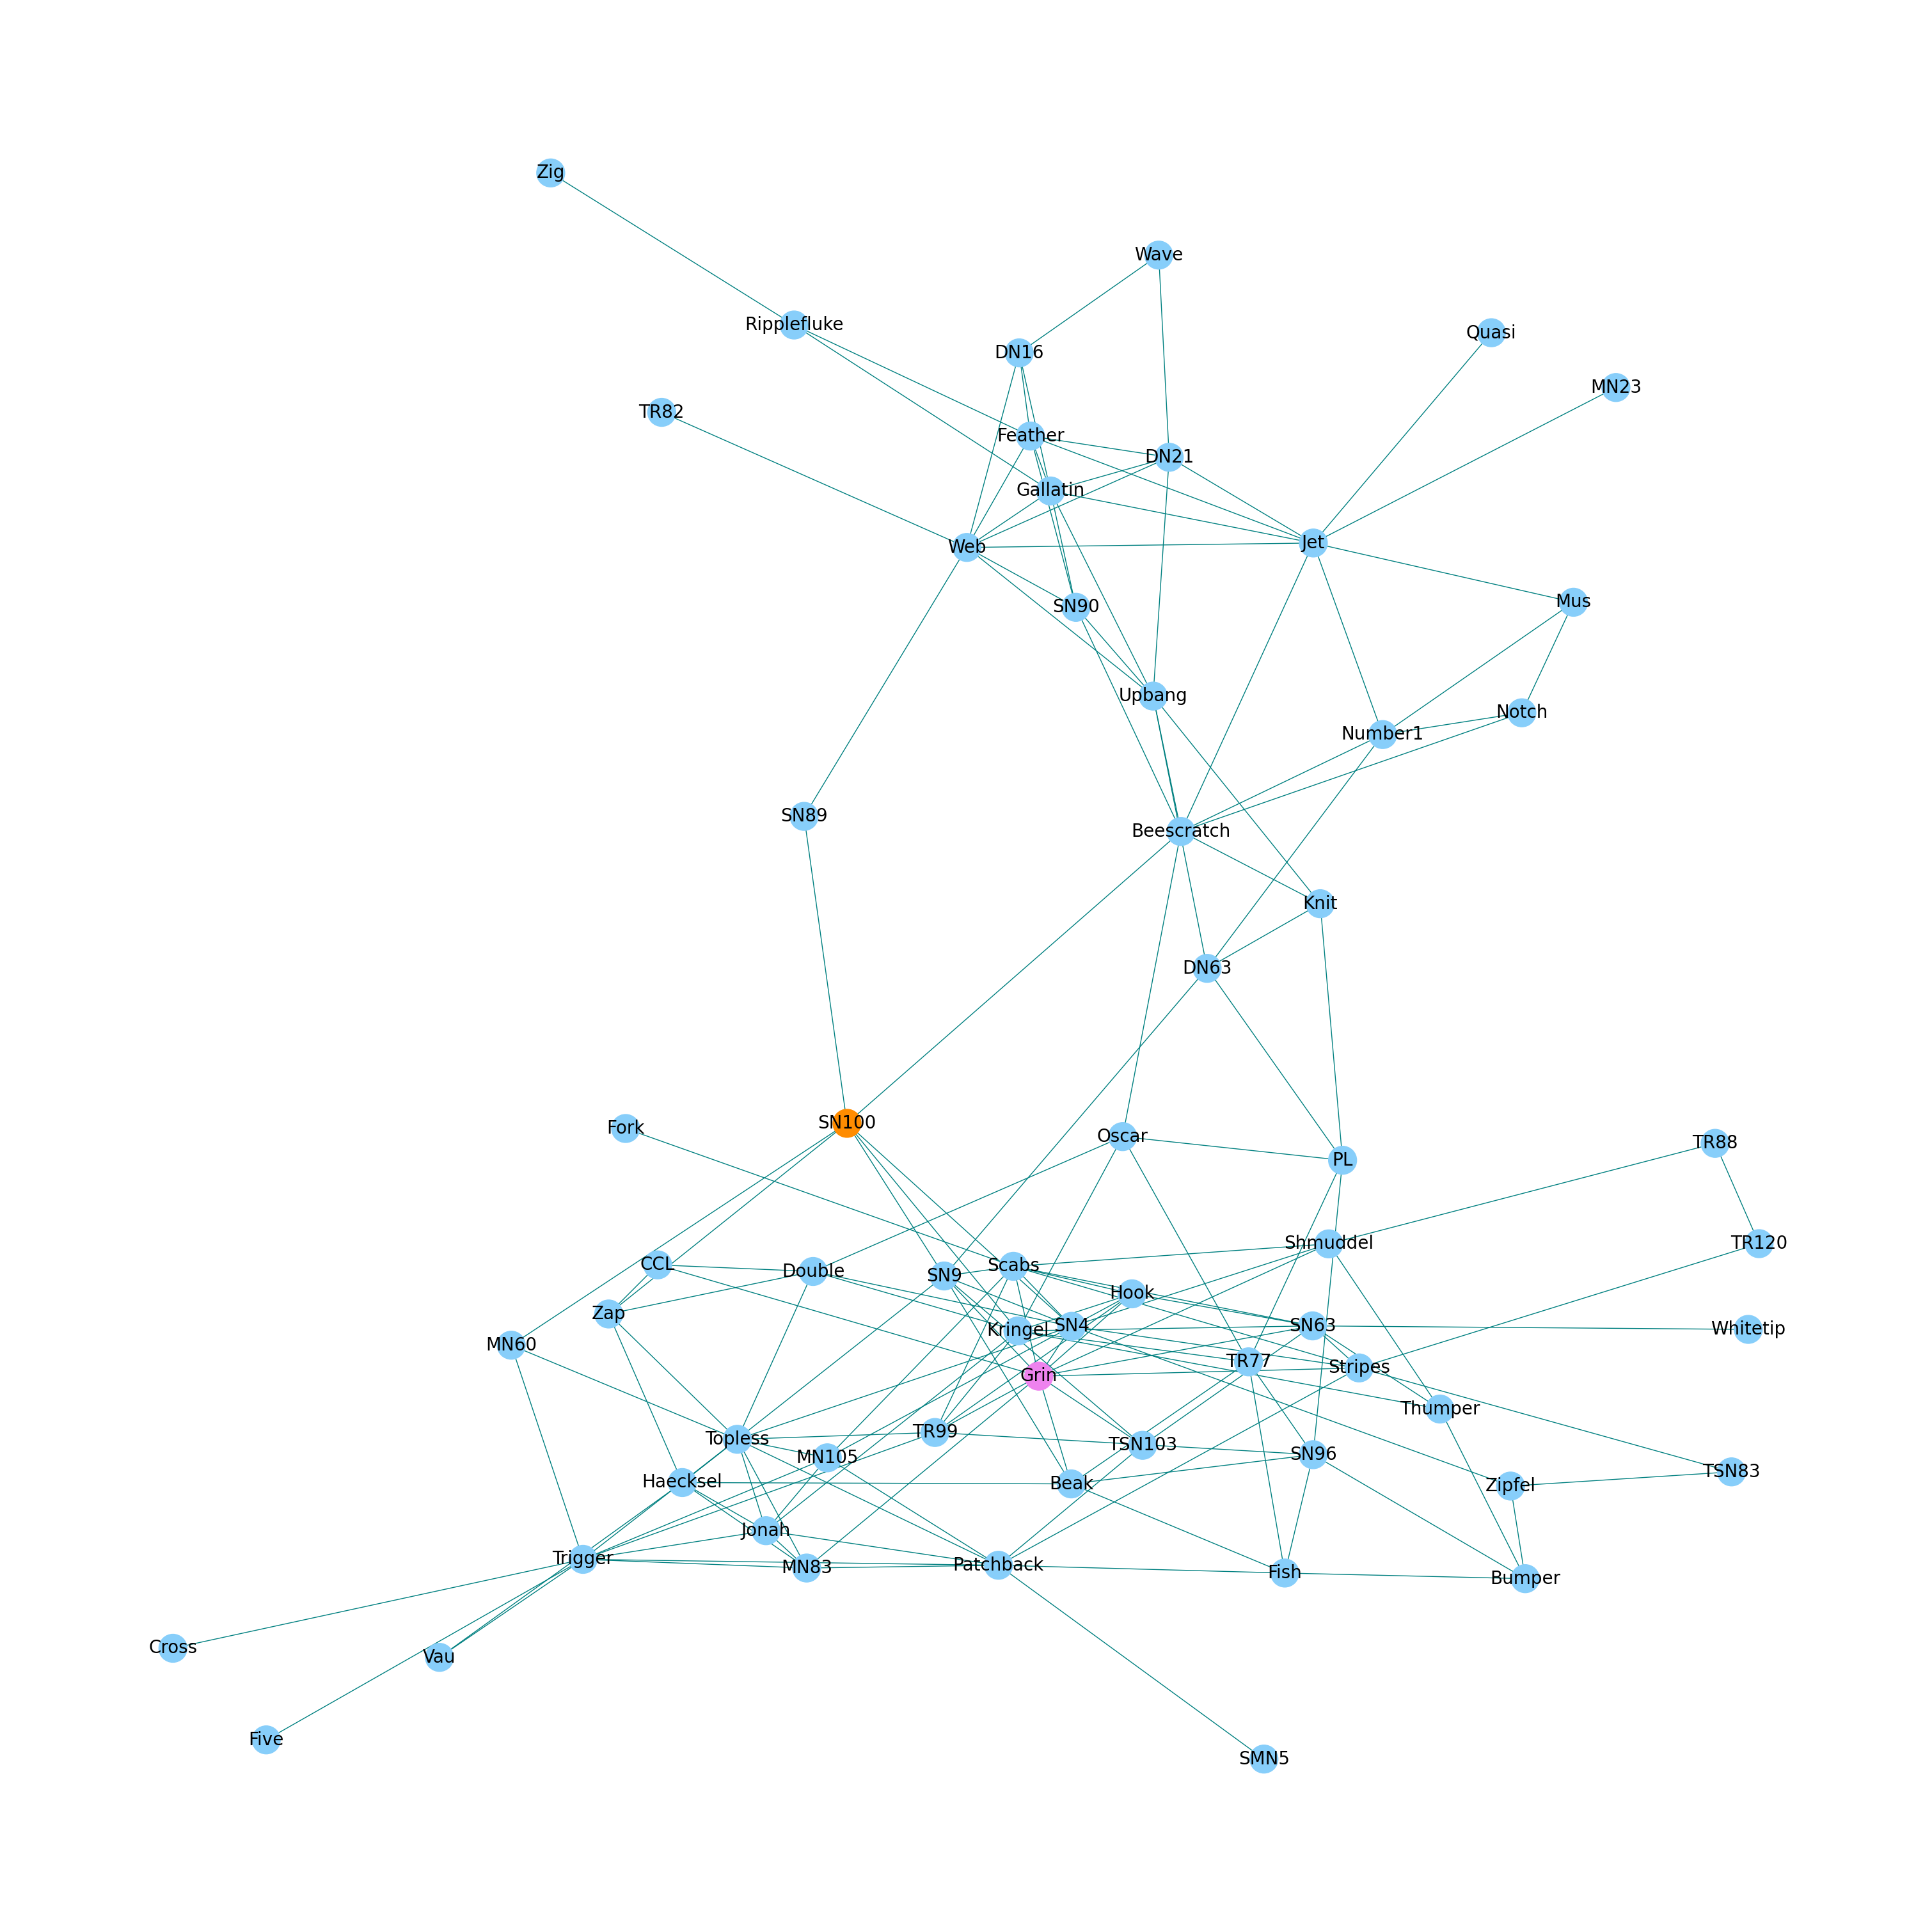

In [15]:
#Plot that outlines which are the most central nodes, or dolphins

plt.figure(figsize = (30,30))
k_pos = nx.spring_layout(Dolphins_G, k=0.05)
colors = ['lightskyblue'] * len(Dolphins)
colors[14] = 'violet'
colors[36] = 'darkorange'
nx.draw(Dolphins_G, k_pos, node_color=colors, node_size=1000, edge_color='teal', with_labels=True, font_size=20)

Do the centrality metrics identify different node(s) as the "most central"?

Yes, a dolphin named Grin has the highest degree centrality and the highest eigenvector centrality, while a dolphin named SN100 has the highest closeness centrality ad the highest betweenness centrality.

Given the context of your dataset, interpret which centrality metric you think is most informative. Explain.

Given the dataset, degree centrality is most informative. Specifically with this dolphin population in the Doubtful Sound, the dolphins rely on community structure and companionship. Degree centrality is based on the number of connections a specific node has, therefore illustrating the foundational aspect of the population.

### Finding and Plotting Communities in the Network

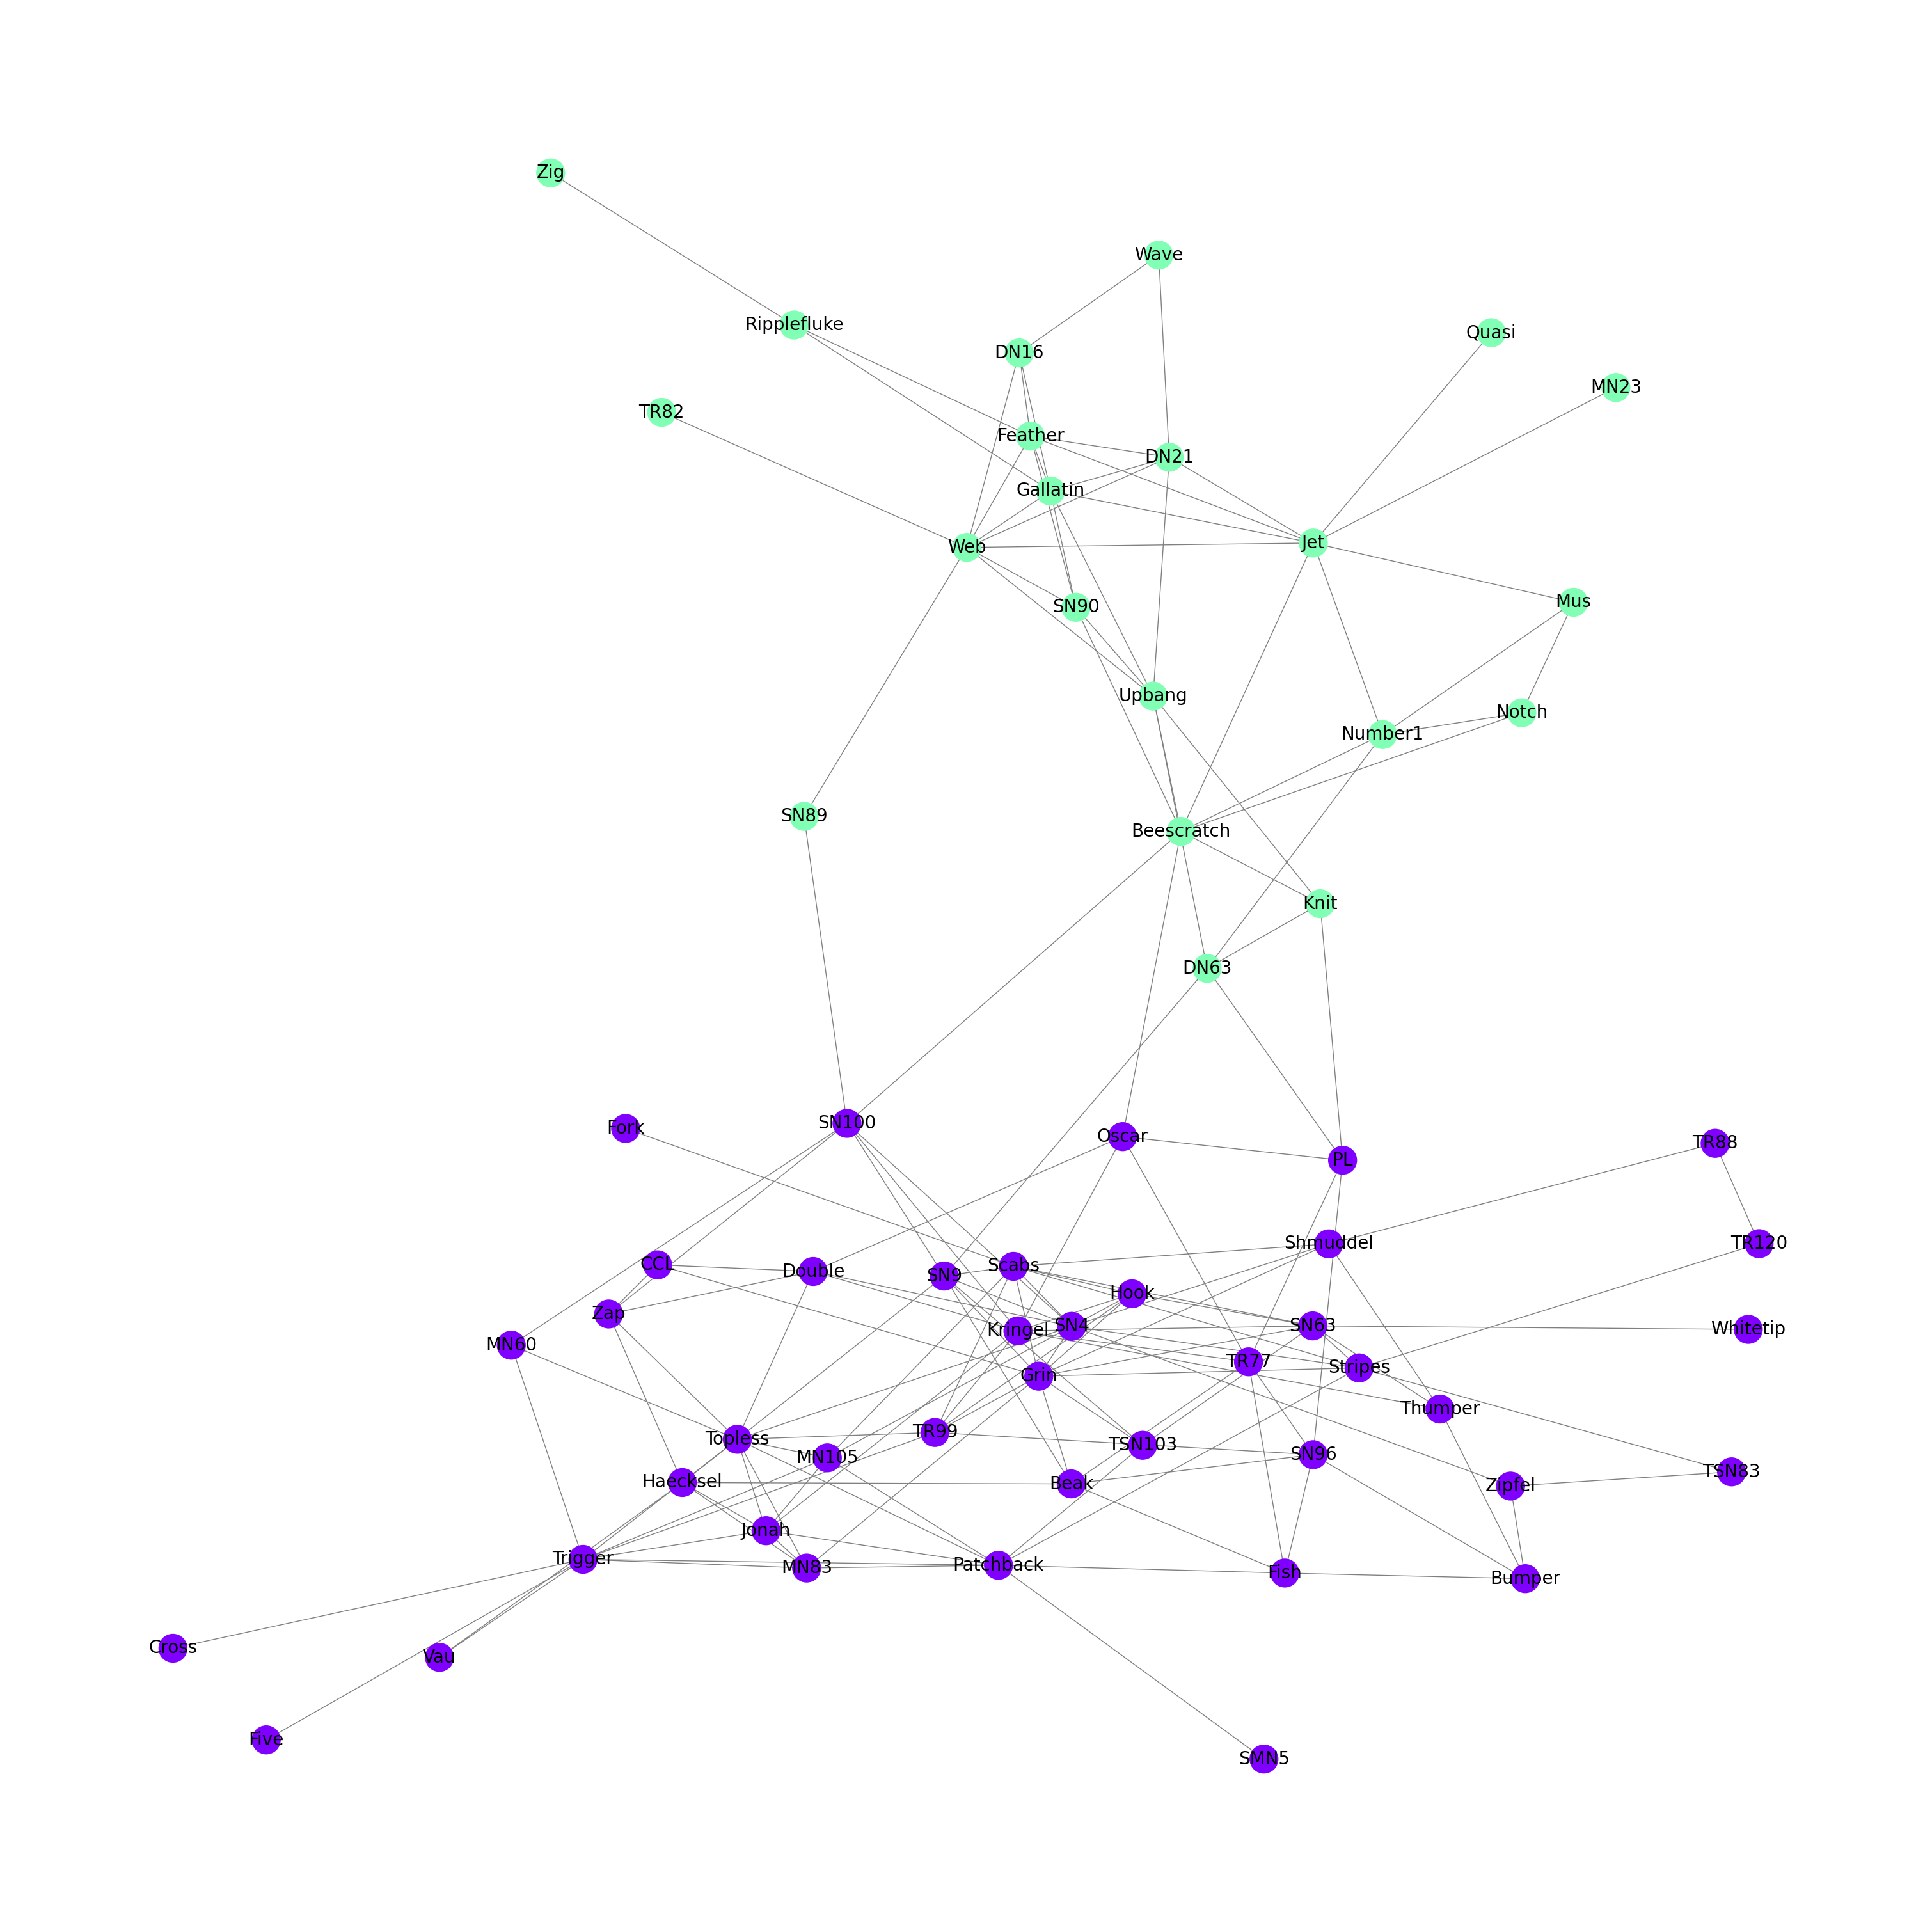

In [16]:
# Girvan-Newman
from networkx.algorithms.community import girvan_newman
comm = girvan_newman(Dolphins_G)
gn_communities = tuple(sorted(c) for c in next(comm))

# Plot the commmunities
import matplotlib.cm as cmx
def switch_to_numbers(G, C):
    num_comm = len(C)
    a = []
    for c in range(num_comm):
        a.append([0])
    for i, node in enumerate(G.nodes()):
        for j in range(num_comm):
            if node in C[j]:
                a[j].append(i)
    for c in range(num_comm):
        a[c] = a[c][1:]
    return a

def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure(figsize = (30,30))
    nx.draw(Network, pos, node_color=color_map, node_size=1000, edge_color='grey', with_labels=True, font_size = 20)
    plt.show()
    return

gn_communities_num = switch_to_numbers(Dolphins_G, gn_communities)
Plot_Comm(Dolphins_G, gn_communities_num, k_pos)

#### Do the identified communities make sense given the context of your data?
Yes, only having two heavily connected communities makes sense given the dolphin population in context. This study emphasizes that all members of the community are closely associated, having constant companionship, thus providing group stability. Due to these characteristics of the dolphin population, having two but heavily connected groups correlates with the context.

### Reporting on One Other Element of the Network

#### Average Shortest Path

In [11]:
print(nx.average_shortest_path_length(dolphin_graph))

3.3569539925965097


#### Degree Distribution


<BarContainer object of 12 artists>

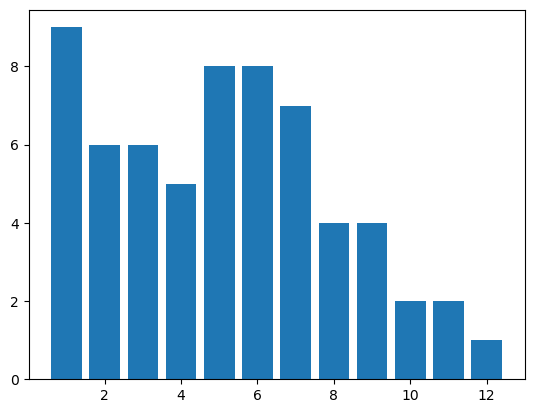

In [10]:
degree_sequence = sorted((d for n, d in Dolphins_G.degree()), reverse=True)
plt.bar(*np.unique(degree_sequence, return_counts=True))

### Conclusions About the Network

Do you think about this dataset differently than you did before?

Connectedness, how close the relationships actually were. This was upheld in all of the work we did in our graph, which is interesting to see how they compare this to other bottlenose dolphin community studies, they actually did find that the ecological factors did play to manking this community connected. 

Did you learn anything about the discipline/domain the network lies in?

Dolphin communities, how ecological factors impact relationships, how might this carry over into human relationships. 

What's something you wish you could learn about the network that you might not have a tool for?

We do not have a tool to understand how the relationships develop over time, and this could be interesting to understand. 


Is there any metadata about the nodes/edges that you wish you could have to interpret your findings better?

Weight, gender

### Citations

D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and S. M. Dawson, The bottlenose dolphin community of Doubtful Sound features a large proportion of long-lasting associations, Behavioral Ecology and Sociobiology 54, 396-405 (2003).

D. Lusseau, The emergent properties of a dolphin social network, Proc. R. Soc. London B (suppl.) 270, S186-S188 (2003).

D. Lusseau, Evidence for social role in a dolphin social network, Preprint q-bio/0607048 (http://arxiv.org/abs/q-bio.PE/0607048)